### Step 1: Pull in Data, preprocess it.

Here I'm using example data from the BioSENSE research group at UC Berekely, collected using a Neurosky device. Simpler than our device, as it only has one sensor at fp2, in comparison to our four. But the essence of the code should be the same.


In [1]:
import json
import pandas as pd
import tensorflow as tf
import numpy as np

df = pd.read_csv("kaggle_data/eeg-data.csv")


In [2]:
df.head()

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label
0,3730,12,2015-05-09 23:13:42.281,1461,2015-05-09 16:13:40.954,0,0,"[944412.0, 111373.0, 52404.0, 28390.0, 3237.0,...","[-203.0, -202.0, -196.0, -185.0, -163.0, -137....",200,2015-05-09 23:13:39.550,2015-05-09 23:13:39.549+00,unlabeled
1,3732,12,2015-05-09 23:13:43.186,1461,2015-05-09 16:13:41.964,0,0,"[1793049.0, 89551.0, 3896.0, 21727.0, 9301.0, ...","[104.0, 134.0, 128.0, 121.0, 145.0, 151.0, 123...",200,2015-05-09 23:13:40.559,2015-05-09 23:13:40.559+00,unlabeled
2,3734,12,2015-05-09 23:13:44.392,1461,2015-05-09 16:13:42.950,0,0,"[400192.0, 640624.0, 153087.0, 69733.0, 98854....","[2002.0, 2047.0, 2047.0, 2047.0, 2047.0, 2047....",200,2015-05-09 23:13:41.549,2015-05-09 23:13:41.549+00,unlabeled
3,3735,12,2015-05-09 23:13:45.297,1461,2015-05-09 16:13:43.935,0,0,"[681192.0, 138630.0, 67891.0, 26459.0, 592240....","[1287.0, 1241.0, 1196.0, 1155.0, 1113.0, 1072....",200,2015-05-09 23:13:42.532,2015-05-09 23:13:42.532+00,unlabeled
4,3737,12,2015-05-09 23:13:46.201,1460,2015-05-09 16:13:44.936,0,0,"[268406.0, 197772.0, 190654.0, 266433.0, 91683...","[1905.0, 1836.0, 1770.0, 1707.0, 1645.0, 1587....",200,2015-05-09 23:13:43.532,2015-05-09 23:13:43.532+00,unlabeled


In [3]:
df.loc[df.label=='math1']

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label
13803,571,1,2015-05-09 23:33:28.977,13403,2015-05-09 16:33:15.726,48,100,"[6650.0, 22871.0, 45854.0, 191253.0, 15457.0, ...","[108.0, 114.0, 120.0, 123.0, 114.0, 104.0, 96....",0,2015-05-09 23:33:02.386,2015-05-09 23:33:02.386+00,math1
13804,23011,4,2015-05-09 23:33:28.985,7691,2015-05-09 19:33:21.374,17,100,"[3131.0, 11610.0, 20863.0, 54613.0, 3711.0, 62...","[88.0, 88.0, 73.0, 74.0, 82.0, 70.0, 58.0, 60....",0,2015-05-09 23:33:13.736,2015-05-09 23:33:13.736+00,math1
13805,12667,2,2015-05-09 23:33:29.017,26,2015-05-09 16:33:29.147,40,48,"[96747.0, 24552.0, 1629.0, 3301.0, 3926.0, 432...","[153.0, 129.0, 118.0, 113.0, 106.0, 108.0, 124...",0,2015-05-09 23:33:29.178,2015-05-09 23:33:29.178+00,math1
13806,6082,14,2015-05-09 23:33:29.052,726,2015-05-09 16:33:28.535,44,69,"[20245.0, 7854.0, 4321.0, 13089.0, 9479.0, 434...","[49.0, 36.0, 28.0, 21.0, 19.0, 9.0, 0.0, 5.0, ...",0,2015-05-09 23:33:27.873,2015-05-09 23:33:27.873+00,math1
13807,3426,12,2015-05-09 23:33:29.109,1504,2015-05-09 16:33:27.868,66,87,"[2740.0, 27325.0, 30234.0, 18751.0, 13404.0, 1...","[11.0, 27.0, 37.0, 17.0, 3.0, 10.0, 25.0, 34.0...",0,2015-05-09 23:33:26.417,2015-05-09 23:33:26.417+00,math1
13808,4894,13,2015-05-09 23:33:29.225,-293,2015-05-09 16:33:29.621,27,53,"[2748564.0, 481537.0, 28312.0, 96849.0, 180628...","[92.0, 107.0, 149.0, 202.0, 228.0, 204.0, 149....",0,2015-05-09 23:33:29.979,2015-05-09 23:33:29.979+00,math1
13809,27666,8,2015-05-09 23:33:29.483,-40,2015-05-09 16:33:29.532,14,70,"[786351.0, 226029.0, 41133.0, 14584.0, 24339.0...","[77.0, 66.0, 64.0, 65.0, 59.0, 59.0, 71.0, 103...",0,2015-05-09 23:33:29.638,2015-05-09 23:33:29.638+00,math1
13810,25824,6,2015-05-09 23:33:29.498,"-1,561",2015-05-09 16:33:31.132,47,30,"[82296.0, 306508.0, 31953.0, 12513.0, 25488.0,...","[-29.0, -42.0, -52.0, -51.0, -39.0, -24.0, -11...",0,2015-05-09 23:33:32.751,2015-05-09 23:33:32.751+00,math1
13811,1262,10,2015-05-09 23:33:29.522,-18,2015-05-09 16:33:29.636,37,70,"[1196729.0, 72232.0, 18068.0, 12065.0, 6169.0,...","[1296.0, 1313.0, 1314.0, 1299.0, 1281.0, 1264....",51,2015-05-09 23:33:29.722,2015-05-09 23:33:29.722+00,math1
13812,2463,11,2015-05-09 23:33:29.599,-179,2015-05-09 16:33:29.976,41,44,"[566294.0, 143887.0, 15984.0, 87967.0, 12868.0...","[-66.0, -43.0, -36.0, -28.0, -4.0, 9.0, 16.0, ...",0,2015-05-09 23:33:30.212,2015-05-09 23:33:30.212+00,math1


#### So we have a general idea of what things look like. Let's convert the readings to numpy arrays.

In [4]:
df.raw_values = df.raw_values.map(json.loads)
df.eeg_power = df.eeg_power.map(json.loads)

#### And for our purposes we have focused and non-focused. Let's pool all the math tasks together. And have relax as the other category.

In [5]:
df.label.unique()

array(['unlabeled', 'blinkInstruction', 'blink1', 'blink2', 'blink3',
       'blink4', 'blink5', 'relaxInstruction', 'relax', 'mathInstruction',
       'math1', 'math2', 'math3', 'math4', 'math5', 'math6', 'math7',
       'math8', 'math9', 'math10', 'math11', 'math12', 'musicInstruction',
       'music', 'videoInstruction', 'video-ver1',
       'thinkOfItemsInstruction-ver1', 'thinkOfItems-ver1',
       'colorInstruction1', 'colorInstruction2', 'readyRound1',
       'colorRound1-1', 'colorRound1-2', 'colorRound1-3', 'colorRound1-4',
       'colorRound1-5', 'colorRound1-6', 'readyRound2', 'colorRound2-1',
       'colorRound2-2', 'colorRound2-3', 'colorRound2-4', 'colorRound2-5',
       'colorRound2-6', 'readyRound3', 'colorRound3-1', 'colorRound3-2',
       'colorRound3-3', 'colorRound3-4', 'colorRound3-5', 'colorRound3-6',
       'readyRound4', 'colorRound4-1', 'colorRound4-2', 'colorRound4-3',
       'colorRound4-4', 'colorRound4-5', 'colorRound4-6', 'readyRound5',
       'colorRound5

In [6]:
relaxed = df[df.label == 'relax']

focused = df[(df.label == 'math1') |
        (df.label == 'math2') |
        (df.label == 'math3') |
        (df.label == 'math4') |
        (df.label == 'math5') |
        (df.label == 'math6') |
        (df.label == 'math7') |
        (df.label == 'math8') |
        (df.label == 'math9') |
        (df.label == 'math10') |
        (df.label == 'math11') |
        (df.label == 'math12')]
print(len(relaxed))
print(len(focused))

934
936


#### Ok, now let's try out an SVM on one of our subjects.

In [7]:
df_grouped = pd.concat([relaxed,focused])

len(df_grouped)

1870

In [8]:
df_grouped[df_grouped['id']==24]

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label
22801,16566,24,2015-05-09 23:43:52.371,"-1,571",2015-05-09 16:43:53.940,66,51,"[128990.0, 10632.0, 4866.0, 1275.0, 2735.0, 71...","[29.0, 25.0, 55.0, 66.0, 18.0, -7.0, 24.0, 16....",0,2015-05-09 23:43:55.568,2015-05-09 23:43:55.568+00,relax
22814,16567,24,2015-05-09 23:43:53.272,"-1,572",2015-05-09 16:43:54.905,77,35,"[109639.0, 22225.0, 2367.0, 2229.0, 2908.0, 62...","[-30.0, 4.0, 90.0, 114.0, 60.0, 11.0, 4.0, 54....",0,2015-05-09 23:43:56.533,2015-05-09 23:43:56.533+00,relax
22828,16568,24,2015-05-09 23:43:54.170,"-1,572",2015-05-09 16:43:55.914,48,47,"[239978.0, 90433.0, 28660.0, 5076.0, 7314.0, 1...","[-360.0, -391.0, -422.0, -421.0, -390.0, -353....",0,2015-05-09 23:43:57.541,2015-05-09 23:43:57.541+00,relax
22844,16569,24,2015-05-09 23:43:55.073,"-1,572",2015-05-09 16:43:56.898,50,50,"[1542887.0, 46220.0, 13829.0, 23160.0, 10673.0...","[133.0, 107.0, 76.0, 98.0, 68.0, 69.0, 195.0, ...",0,2015-05-09 23:43:58.523,2015-05-09 23:43:58.523+00,relax
22864,16570,24,2015-05-09 23:43:56.273,"-1,571",2015-05-09 16:43:57.905,64,43,"[139942.0, 43078.0, 4189.0, 11875.0, 14078.0, ...","[123.0, 74.0, 40.0, 84.0, 84.0, 27.0, 28.0, 75...",0,2015-05-09 23:43:59.534,2015-05-09 23:43:59.534+00,relax
22875,16571,24,2015-05-09 23:43:57.173,"-1,571",2015-05-09 16:43:58.899,61,54,"[384736.0, 35298.0, 18890.0, 16778.0, 30669.0,...","[-42.0, -14.0, -17.0, -27.0, -86.0, -116.0, -1...",0,2015-05-09 23:44:00.525,2015-05-09 23:44:00.525+00,relax
22890,16572,24,2015-05-09 23:43:58.073,"-1,571",2015-05-09 16:43:59.906,81,56,"[108563.0, 44355.0, 19714.0, 2775.0, 6193.0, 6...","[25.0, 45.0, 32.0, 41.0, 41.0, 52.0, 64.0, 59....",0,2015-05-09 23:44:01.532,2015-05-09 23:44:01.532+00,relax
22912,16573,24,2015-05-09 23:43:59.273,"-1,571",2015-05-09 16:44:00.891,81,63,"[21447.0, 35430.0, 46456.0, 14270.0, 9174.0, 8...","[33.0, 69.0, 37.0, -14.0, -14.0, 39.0, 120.0, ...",0,2015-05-09 23:44:02.518,2015-05-09 23:44:02.518+00,relax
22924,16574,24,2015-05-09 23:44:00.172,"-1,571",2015-05-09 16:44:01.898,87,69,"[7613.0, 15930.0, 5178.0, 8712.0, 3263.0, 8210...","[5.0, 53.0, 81.0, 67.0, 50.0, 65.0, 87.0, 71.0...",0,2015-05-09 23:44:03.526,2015-05-09 23:44:03.526+00,relax
22936,16575,24,2015-05-09 23:44:01.071,"-1,571",2015-05-09 16:44:02.914,93,64,"[88781.0, 11124.0, 899.0, 4842.0, 3690.0, 5684...","[17.0, 27.0, 19.0, 2.0, 1.0, 16.0, 19.0, 25.0,...",0,2015-05-09 23:44:04.541,2015-05-09 23:44:04.541+00id,relax


In [9]:
df_clean = df_grouped[['id','eeg_power', 'raw_values', 'label']]

In [10]:
df_clean.loc[:,'label'][df_clean.label != 'relax'] = 'focus'

/Users/kitfarfan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kitfarfan/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/kitfarfan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, sel

In [11]:
df_clean

,id,eeg_power,raw_values,label
13274,7,"[5044.0, 10156.0, 3281.0, 10403.0, 12393.0, 10...","[285.0, 241.0, 200.0, 161.0, 129.0, 90.0, 33.0...",relax
13275,11,"[548188.0, 67192.0, 20298.0, 4142.0, 30576.0, ...","[-12.0, -60.0, -70.0, -74.0, -129.0, -183.0, -...",relax
13276,5,"[449571.0, 83093.0, 15379.0, 34656.0, 6750.0, ...","[37.0, 43.0, 42.0, 25.0, 12.0, 25.0, 42.0, 48....",relax
13277,1,"[85497.0, 20547.0, 2723.0, 3270.0, 2522.0, 220...","[17.0, 19.0, 23.0, 25.0, 27.0, 38.0, 51.0, 52....",relax
13278,13,"[72768.0, 44080.0, 25974.0, 16079.0, 12995.0, ...","[99.0, 69.0, 9.0, -4.0, 16.0, 16.0, 17.0, 27.0...",relax
13279,14,"[10171.0, 13086.0, 13814.0, 9290.0, 9794.0, 82...","[39.0, 26.0, 18.0, 25.0, 40.0, 49.0, 58.0, 49....",relax
13280,4,"[486066.0, 154967.0, 11921.0, 16636.0, 13902.0...","[-3.0, -59.0, -28.0, 53.0, 105.0, 105.0, 98.0,...",relax
13281,6,"[769537.0, 132633.0, 8882.0, 104962.0, 31441.0...","[2.0, -4.0, -9.0, -30.0, -58.0, -52.0, -12.0, ...",relax
13282,2,"[67919.0, 13799.0, 27658.0, 18156.0, 19295.0, ...","[-59.0, -56.0, -58.0, -59.0, -54.0, -40.0, -26...",relax
13283,12,"[1413027.0, 38537.0, 45687.0, 17712.0, 55097.0...","[66.0, 67.0, 67.0, 60.0, 66.0, 80.0, 89.0, 81....",relax


In [12]:
df_one_subject = df_clean[df_clean['id']==1]

In [13]:
len(df_one_subject)

60

In [14]:
X = df_one_subject.drop(['label','raw_values'],1)
y = df_one_subject['label']

In [15]:
len(X)

60

Split each power reading into it's own column

In [16]:
eegpower_series = pd.Series(X['eeg_power']) 
eeg_cols=pd.DataFrame(eegpower_series.tolist()) 
eeg_cols['id'] = X['id'].values


In [17]:
eeg_cols = eeg_cols.drop('id',1)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(eeg_cols,y,test_size=0.1)

In [19]:
X_train

,0,1,2,3,4,5,6,7
16,179968.0,17539.0,16643.0,31706.0,13303.0,6961.0,3359.0,2656.0
3,160552.0,44796.0,13555.0,21970.0,12998.0,4266.0,2635.0,1820.0
38,17637.0,8693.0,66763.0,146565.0,24592.0,6576.0,2300.0,2203.0
40,13230.0,8127.0,11132.0,122631.0,11565.0,4495.0,2669.0,641.0
41,3696.0,36922.0,27992.0,222616.0,16098.0,30599.0,2910.0,1014.0
26,21452.0,37577.0,26425.0,4587.0,18445.0,9730.0,1633.0,1410.0
23,190851.0,46447.0,7622.0,9326.0,11090.0,20169.0,3870.0,1336.0
21,396835.0,313031.0,12196.0,13806.0,6779.0,9723.0,2633.0,1156.0
2,155790.0,43496.0,14414.0,8105.0,8255.0,7485.0,2610.0,4343.0
13,634547.0,16889.0,3938.0,4585.0,3886.0,2120.0,1839.0,963.0


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
def cross_val_svm (X,y,n,kern='rbf'):
    clf = svm.SVC(kernel=kern)
    scores = cross_val_score(clf, X, y, cv=n)
    return scores   

In [21]:
cross_val_svm(X_train,y_train,4)

array([ 0.5,  0.5,  0.5,  0.5])

### So this is pretty poor performance. To be fair we haven't tried very hard to optimize things. But we already know working with the raw spectrum and processing that is how the literature proceeds. Don't even know how one gets these power readings (something about the main frequency bands, blah blah blah)

#### So lets fast fourier transform the raw signal and get our own poewr spectrum. And as per the literature review team's findings, we should average them out and log bin them. 

In [22]:
from scipy import stats
from scipy.interpolate import interp1d
import itertools

def spectrum (vector):
    #get power spectrum from array of raw EEG reading
    fourier = np.fft.fft(vector)
    pow_spec = np.abs(fourier)**2
    pow_spec = pow_spec[:len(pow_spec)//2] #look this up j.i.c.
    return pow_spec

In [23]:
def binned (pspectra, n):
    #compress an array of power spectra into vectors of length n'''
    l = len(pspectra)
    array = np.zeros([l,n])
    for i,ps in enumerate(pspectra):
        x = np.arange(1,len(ps)+1)
        f = interp1d(x,ps)#/np.sum(ps))
        array[i] = f(np.arange(1, n+1))
    index = np.argwhere(array[:,0]==-1)
    array = np.delete(array,index,0)
    return array

def feature_vector (readings, bins=100): # A function we apply to each group of power spectr
    bins = binned(list(map(spectrum, readings)), bins)
    return np.log10(np.mean(bins, 0))

def grouper(n, iterable, fillvalue=None):
    #"grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

def vectors (df):
    return [feature_vector(group) for group in list(grouper(3, df.raw_values.tolist()))[:-1]]

In [24]:
raw_reads = df_one_subject.raw_values[:3]
raw_reads

13277    [17.0, 19.0, 23.0, 25.0, 27.0, 38.0, 51.0, 52....
13291    [44.0, 45.0, 45.0, 51.0, 48.0, 45.0, 48.0, 42....
13305    [-30.0, -33.0, -27.0, -29.0, -33.0, -33.0, -38...
Name: raw_values, dtype: object

In [25]:
df_one_subject

,id,eeg_power,raw_values,label
13277,1,"[85497.0, 20547.0, 2723.0, 3270.0, 2522.0, 220...","[17.0, 19.0, 23.0, 25.0, 27.0, 38.0, 51.0, 52....",relax
13291,1,"[50036.0, 57439.0, 17659.0, 5816.0, 10021.0, 2...","[44.0, 45.0, 45.0, 51.0, 48.0, 45.0, 48.0, 42....",relax
13305,1,"[155790.0, 43496.0, 14414.0, 8105.0, 8255.0, 7...","[-30.0, -33.0, -27.0, -29.0, -33.0, -33.0, -38...",relax
13323,1,"[160552.0, 44796.0, 13555.0, 21970.0, 12998.0,...","[57.0, 40.0, 3.0, -10.0, 16.0, 42.0, 65.0, 77....",relax
13338,1,"[18471.0, 31938.0, 35127.0, 14536.0, 8849.0, 4...","[-1.0, 12.0, 19.0, 16.0, 5.0, 9.0, 32.0, 45.0,...",relax
13351,1,"[654856.0, 15593.0, 29536.0, 2195.0, 9782.0, 4...","[29.0, 24.0, 20.0, 17.0, 12.0, 18.0, 28.0, 44....",relax
13368,1,"[55626.0, 8455.0, 2310.0, 17392.0, 7531.0, 830...","[70.0, 102.0, 81.0, 45.0, 35.0, 40.0, 40.0, 37...",relax
13382,1,"[7146.0, 51617.0, 19665.0, 9369.0, 6162.0, 714...","[7.0, 39.0, 49.0, 23.0, -2.0, -7.0, 16.0, 17.0...",relax
13396,1,"[34044.0, 19587.0, 3982.0, 7801.0, 6282.0, 397...","[26.0, 44.0, 60.0, 75.0, 97.0, 102.0, 89.0, 73...",relax
13411,1,"[223971.0, 105078.0, 1440.0, 21766.0, 51282.0,...","[121.0, 140.0, 128.0, 96.0, 102.0, 124.0, 120....",relax


In [26]:
data = vectors(df_one_subject[df_one_subject.label=='relax'])
data

[array([ 8.77729055,  7.53916731,  7.55516116,  7.23239068,  7.01675079,
         7.37329741,  7.03001973,  7.04118134,  6.60948299,  6.54998945,
         6.13324229,  6.86127811,  6.62450289,  6.14979144,  5.58525487,
         6.53495161,  6.61413826,  6.61179276,  6.00491282,  6.20782837,
         5.46890982,  6.21713411,  6.02017807,  5.84342326,  6.23202742,
         5.62351302,  5.61358655,  5.58329695,  5.9686238 ,  5.26907726,
         5.85388527,  5.33256733,  5.51341758,  5.40240597,  5.6823978 ,
         5.24600035,  5.13282385,  5.29766656,  5.64184582,  5.44532181,
         5.72985655,  5.43247882,  5.88447448,  4.77956831,  4.98151157,
         4.8418777 ,  5.88474959,  5.56132346,  5.68649682,  5.1892886 ,
         5.31020917,  5.53784948,  5.41569152,  5.59090476,  5.2850484 ,
         5.44075421,  5.50147526,  5.65054295,  4.8943596 ,  5.171161  ,
         5.41186046,  4.75274427,  5.15179548,  5.55582247,  5.3432178 ,
         5.14322297,  5.25719721,  5.36058606,  4.5

In [27]:
data2 = vectors(df_one_subject[df_one_subject.label=='focus'])
data2

[array([ 8.76608271,  6.69599274,  6.54991526,  6.54618049,  7.19442741,
         6.78267125,  6.54205664,  6.5951935 ,  6.58337182,  6.40486206,
         7.2322399 ,  7.12306477,  6.67227483,  5.78494164,  6.80088907,
         6.65161882,  5.96271552,  6.73327785,  6.34245621,  6.13790564,
         6.12782901,  6.36634545,  6.19294295,  6.39821999,  5.99844237,
         5.61909601,  5.98321597,  5.88812339,  5.91791832,  5.77988968,
         6.01255254,  6.05371442,  5.72779158,  5.73504236,  5.81643066,
         5.44364226,  5.3274653 ,  5.53806083,  5.35485763,  5.85886929,
         5.92853325,  5.48250739,  5.58057303,  5.56673197,  5.44213032,
         5.72627219,  5.87721948,  5.3866918 ,  5.79798114,  5.15838678,
         5.56081336,  5.53061396,  5.31727831,  5.74977726,  5.20628794,
         4.97253073,  5.51429704,  5.4840289 ,  4.95955857,  5.09956305,
         5.315997  ,  5.04251063,  4.82094407,  5.31705878,  5.42670883,
         5.36630721,  5.3250837 ,  4.92255337,  5.0

In [28]:
def vectors_labels (list1, list2):
    def label (l):
        return lambda x: l
    X = list1 + list2
    y = list(map(label(0), list1)) + list(map(label(1), list2))
    return X, y

In [29]:
X,y =vectors_labels(data,data2)

In [30]:
y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [32]:
np.mean(cross_val_svm(X_train,y_train,7))

0.9285714285714286

### Wow. Excellent score. Not bad for only one real input

In [35]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
cross_val_svm(X_train,y_train,7).mean()

0.8571428571428571

In [37]:
data = vectors(df_clean[df_clean.label=='focus'])

data2 = vectors(df_clean[df_clean.label=='focus'])

X,y = vectors_labels(data,data2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
np.mean(cross_val_svm(X_train,y_train,5))

0.46462626262626261

### As expected though, we don't do well when combining all our test subjects. We're going to need to train the app on individuals.

In [41]:
X_train = preprocessing.scale(X_train)

In [43]:
cross_val_svm(X_train,y_train,5).mean()

0.25541414141414143

### LOL
that settles it then...

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators = 200,max_depth = 10)
data = vectors(df_clean[df_clean.label=='focus'])

data2 = vectors(df_clean[df_clean.label=='focus'])

X,y = vectors_labels(data,data2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
np.mean(cross_val_score(rf,X_train,y_train))

0.1891489747777173

##### def cross_val_svm (X,y,n,kern='rbf'):


In [48]:
def subject_scores (subject,kern):
    f = focused[focused['id']==subject]
    r = relaxed[relaxed['id']==subject]
    X,y = vectors_labels(vectors(f),vectors(r))
    X=preprocessing.scale(X)
    return cross_val_svm(X,y,7,kern).mean()

In [49]:
for s in range(1,31):
    print("Subject ",s, " score is:", subject_scores(s,'linear'))

Subject  1  score is: 1.0
Subject  2  score is: 0.892857142857
Subject  3  score is: 1.0
Subject  4  score is: 0.928571428571
Subject  5  score is: 0.928571428571
Subject  6  score is: 0.535714285714
Subject  7  score is: 0.738095238095
Subject  8  score is: 0.607142857143
Subject  9  score is: 0.607142857143
Subject  10  score is: 0.571428571429
Subject  11  score is: 0.821428571429
Subject  12  score is: 0.857142857143
Subject  13  score is: 0.964285714286
Subject  14  score is: 0.892857142857
Subject  15  score is: 0.607142857143
Subject  16  score is: 0.964285714286
Subject  17  score is: 0.666666666667
Subject  18  score is: 0.642857142857
Subject  19  score is: 0.964285714286
Subject  20  score is: 0.571428571429
Subject  21  score is: 0.857142857143
Subject  22  score is: 0.392857142857
Subject  23  score is: 0.464285714286
Subject  24  score is: 0.964285714286
Subject  25  score is: 0.642857142857
Subject  26  score is: 0.714285714286
Subject  27  score is: 0.857142857143
Subje

In [50]:
import matplotlib.pyplot as plt

Average score is:  0.75873015873
Standard deviation is:  0.174231205516


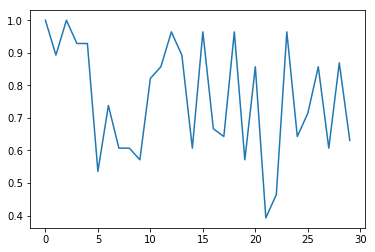

In [57]:
scores = []
for s in range(1,31):
    scores.append(subject_scores(s,'linear'))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)
print("Average score is: ", np.mean(scores))
print("Standard deviation is: ", np.std(scores))

Average score is:  0.781746031746
Standard deviation is:  0.158839248228


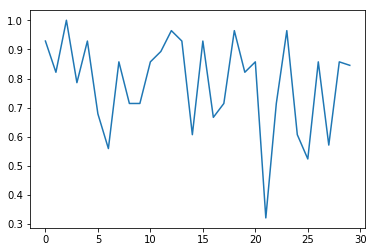

In [58]:
scores = []
for s in range(1,31):
    scores.append(subject_scores(s,'rbf'))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)
print("Average score is: ", np.mean(scores))
print("Standard deviation is: ", np.std(scores))

Average score is:  0.589682539683
Standard deviation is:  0.133797849196


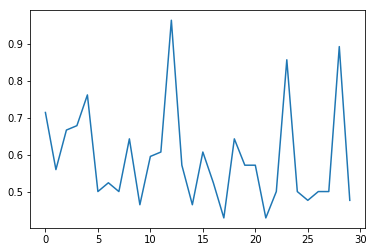

In [59]:
scores = []
for s in range(1,31):
    scores.append(subject_scores(s,'poly'))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)
print("Average score is: ", np.mean(scores))
print("Standard deviation is: ", np.std(scores))

Average score is:  0.771428571429
Standard deviation is:  0.157196960383


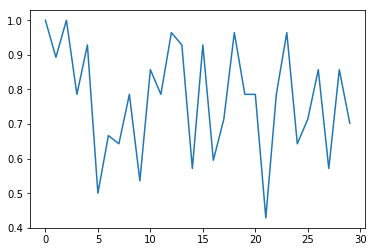

In [60]:
scores = []
for s in range(1,31):
    scores.append(subject_scores(s,'sigmoid'))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)
print("Average score is: ", np.mean(scores))
print("Standard deviation is: ", np.std(scores))